<AxesSubplot:xlabel='Date'>

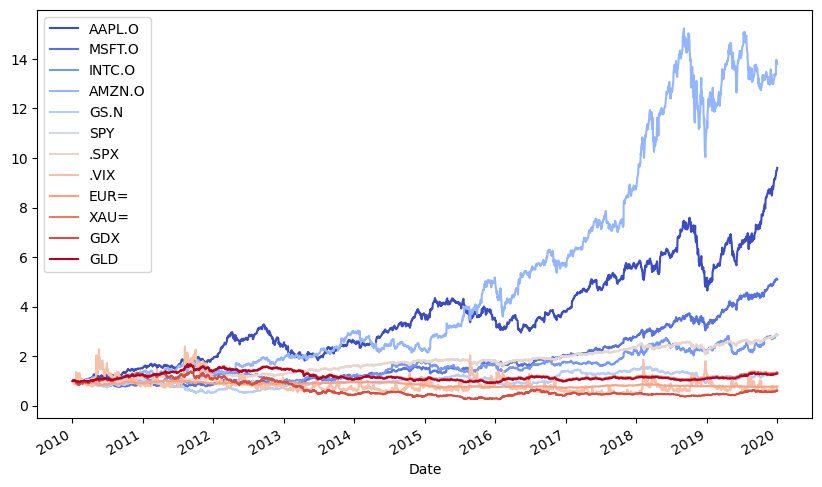

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

url = 'http://hilpisch.com/aiif_eikon_eod_data.csv' 
data = pd.read_csv(url, index_col=0, parse_dates=True).dropna()
(data / data.iloc[0]).plot(figsize=(10,6), cmap='coolwarm')

In [9]:
data.iloc[0]

AAPL.O      30.572827
MSFT.O      30.950000
INTC.O      20.880000
AMZN.O     133.900000
GS.N       173.080000
SPY        113.330000
.SPX      1132.990000
.VIX        20.040000
EUR=         1.441100
XAU=      1120.000000
GDX         47.710000
GLD        109.800000
Name: 2010-01-04 00:00:00, dtype: float64

In [10]:
data.head()

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2010-01-04,30.572827,30.950,20.88,133.90,173.08,113.33,1132.99,20.04,1.4411,1120.00,47.71,109.80
2010-01-05,30.625684,30.960,20.87,134.69,176.14,113.63,1136.52,19.35,1.4368,1118.65,48.17,109.70
2010-01-06,30.138541,30.770,20.80,132.25,174.26,113.71,1137.14,19.16,1.4412,1138.50,49.34,111.51
2010-01-07,30.082827,30.452,20.60,130.00,177.67,114.19,1141.69,19.06,1.4318,1131.90,49.10,110.82
2010-01-08,30.282827,30.660,20.83,133.52,174.31,114.57,1144.98,18.13,1.4412,1136.10,49.84,111.37


In [11]:
data/data.iloc[0]

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2010-01-04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2010-01-05,1.001729,1.000323,0.999521,1.005900,1.017680,1.002647,1.003116,0.965569,0.997016,0.998795,1.009642,0.999089
2010-01-06,0.985795,0.994184,0.996169,0.987677,1.006818,1.003353,1.003663,0.956088,1.000069,1.016518,1.034165,1.015574
2010-01-07,0.983973,0.983910,0.986590,0.970874,1.026520,1.007588,1.007679,0.951098,0.993547,1.010625,1.029134,1.009290
2010-01-08,0.990514,0.990630,0.997605,0.997162,1.007107,1.010941,1.010583,0.904691,1.000069,1.014375,1.044645,1.014299
...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-24,9.298126,5.084976,2.845307,13.362285,1.328345,2.834466,2.845021,0.632236,0.769343,1.338223,0.600713,1.286612
2019-12-26,9.482604,5.126656,2.864943,13.956460,1.335856,2.849554,2.859610,0.631238,0.769967,1.349373,0.609516,1.296721
2019-12-27,9.479006,5.136026,2.877395,13.964152,1.332679,2.848848,2.859707,0.670160,0.775449,1.348586,0.605114,1.296266


In [12]:
lags = 7
def add_lags(data, ric, lags):
    cols = []
    df = pd.DataFrame(data[ric])
    for lag in range(1, lags + 1):
        col = 'lag={}'.format(lag)
        df[col] = df[ric].shift(lag)
        cols.append(col)
    df.dropna(inplace=True)
    return df, cols

In [13]:
dfs = {}
for sym in data.columns:
    df, cols = add_lags(data, sym, lags)
    dfs[sym] = df

In [14]:
dfs[sym].head()

,GLD,lag=1,lag=2,lag=3,lag=4,lag=5,lag=6,lag=7
Date,,,,,,,,
2010-01-13,111.54,110.49,112.85,111.37,110.82,111.51,109.70,109.80
2010-01-14,112.03,111.54,110.49,112.85,111.37,110.82,111.51,109.70
2010-01-15,110.86,112.03,111.54,110.49,112.85,111.37,110.82,111.51
2010-01-19,111.52,110.86,112.03,111.54,110.49,112.85,111.37,110.82
2010-01-20,108.94,111.52,110.86,112.03,111.54,110.49,112.85,111.37


In [15]:
regs = {}
for sym in data.columns:
    df = dfs[sym]
    reg = np.linalg.lstsq(df[cols], df[sym], rcond=-1)[0]
    regs[sym] = reg
    
rega = np.stack(tuple(regs.values()))
regd = pd.DataFrame(rega, columns=cols, index=data.columns)
regd

,lag=1,lag=2,lag=3,lag=4,lag=5,lag=6,lag=7
AAPL.O,1.010572,-0.059223,0.025791,0.053513,-0.017241,0.006026,-0.018444
MSFT.O,0.892760,0.011245,0.117456,-0.083167,-0.025838,0.056735,0.032256
INTC.O,0.951860,0.057875,0.049000,-0.077168,-0.037288,0.044927,0.011243
AMZN.O,0.979914,-0.013370,0.020554,0.000707,0.052510,-0.045160,0.005589
GS.N,0.980616,0.034161,-0.017218,0.004189,-0.038709,0.058471,-0.021468
SPY,0.969174,0.006678,0.022766,-0.024438,-0.023662,0.037870,0.012073
.SPX,0.967234,0.010588,0.021875,-0.025242,-0.031784,0.051474,0.006321
.VIX,0.882277,0.059139,-0.028948,0.028449,-0.025578,0.051097,0.030567
EUR=,0.985907,0.023882,-0.048428,0.050793,-0.021690,0.014885,-0.005478
XAU=,0.986444,0.006938,0.016628,-0.021549,0.004358,0.019784,-0.012540


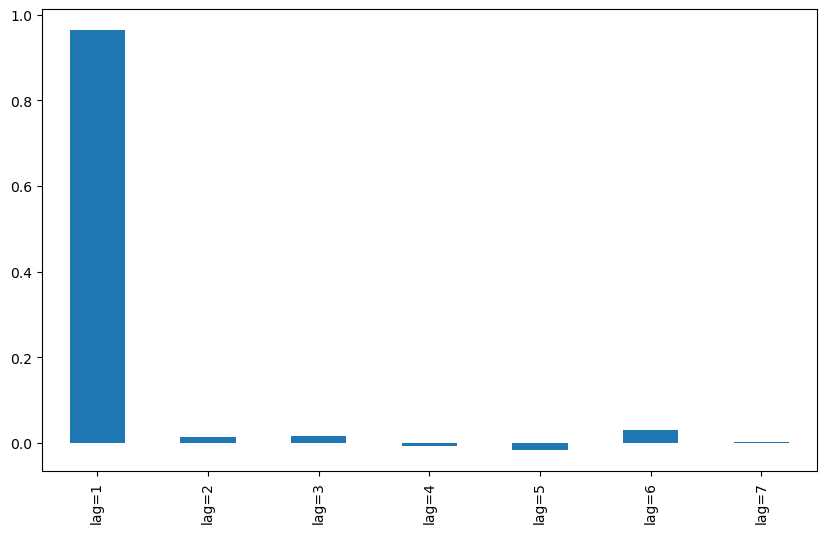

In [16]:
regd.mean().plot(kind='bar', figsize=(10, 6));

In [17]:
dfs[sym].corr()

,GLD,lag=1,lag=2,lag=3,lag=4,lag=5,lag=6,lag=7
GLD,1.000000,0.997249,0.994624,0.991995,0.989327,0.986700,0.984142,0.981525
lag=1,0.997249,1.000000,0.997246,0.994625,0.991997,0.989331,0.986709,0.984154
lag=2,0.994624,0.997246,1.000000,0.997245,0.994623,0.991999,0.989332,0.986712
lag=3,0.991995,0.994625,0.997245,1.000000,0.997245,0.994625,0.992003,0.989338
lag=4,0.989327,0.991997,0.994623,0.997245,1.000000,0.997246,0.994629,0.992009
lag=5,0.986700,0.989331,0.991999,0.994625,0.997246,1.000000,0.997246,0.994631
lag=6,0.984142,0.986709,0.989332,0.992003,0.994629,0.997246,1.000000,0.997247
lag=7,0.981525,0.984154,0.986712,0.989338,0.992009,0.994631,0.997247,1.000000


In [18]:
from statsmodels.tsa.stattools import adfuller
adfuller(data[sym].dropna())

(-1.948896957700994,
 0.30941930740347245,
 0,
 2515,
 {'1%': -3.4329527780962255,
  '5%': -2.8626898965523724,
  '10%': -2.567382133955709},
 8446.683102944744)

In [38]:
rets = np.log(data / data.shift(1)) # 로그 return을 구함
rets.dropna(inplace=True)
dfs = {}
for sym in data:
    df, cols = add_lags(rets, sym, lags) # log return을 lagging

    mu, std = df[cols].mean(), df[cols].std() # Gaussian normalization 적용
    df[cols] = (df[cols] - mu) / std
    dfs[sym] = df
    
dfs[sym].head()

,GLD,lag=1,lag=2,lag=3,lag=4,lag=5,lag=6,lag=7
Date,,,,,,,,
2010-01-14,0.004383,0.957016,-2.169168,1.338562,0.495878,-0.643425,1.661323,-0.102756
2010-01-15,-0.010499,0.437942,0.957072,-2.168945,1.338780,0.496562,-0.643624,1.661401
2010-01-19,0.005936,-1.084249,0.438481,0.956179,-2.168991,1.339545,0.495757,-0.643545
2010-01-20,-0.023407,0.596726,-1.082292,0.437772,0.956368,-2.168567,1.338291,0.495834
2010-01-21,-0.014516,-2.404546,0.597117,-1.082458,0.437922,0.957096,-2.167953,1.338369


In [20]:
adfuller(dfs[sym]['lag=1'])

(-51.56825150582553,
 0.0,
 0,
 2507,
 {'1%': -3.4329610922579095,
  '5%': -2.8626935681060375,
  '10%': -2.567384088736619},
 7017.165474260226)

In [35]:
dfs[sym].corr()

,GLD,lag=1,lag=2,lag=3,lag=4,lag=5,lag=6,lag=7
GLD,1.000000,-0.029691,0.000300,0.012635,-0.002562,-0.005939,0.009852,-0.001343
lag=1,-0.029691,1.000000,-0.030501,0.000814,0.012765,-0.002876,-0.005323,0.009804
lag=2,0.000300,-0.030501,1.000000,-0.031617,0.000320,0.013234,-0.004335,-0.005237
lag=3,0.012635,0.000814,-0.031617,1.000000,-0.031329,-0.000007,0.014115,-0.004387
lag=4,-0.002562,0.012765,0.000320,-0.031329,1.000000,-0.031761,0.000226,0.014067
lag=5,-0.005939,-0.002876,0.013234,-0.000007,-0.031761,1.000000,-0.032289,0.000217
lag=6,0.009852,-0.005323,-0.004335,0.014115,0.000226,-0.032289,1.000000,-0.032351
lag=7,-0.001343,0.009804,-0.005237,-0.004387,0.014067,0.000217,-0.032351,1.000000


In [45]:
%%time
from sklearn.metrics import accuracy_score

for sym in data:
    df = dfs[sym]
    reg = np.linalg.lstsq(df[cols], df[sym], rcond=-1)[0] # regression step
    pred = np.dot(df[cols], reg) # prediction step
    acc = accuracy_score(np.sign(df[sym]), np.sign(pred)) # prediction의 accuracy 계산
    print(f'OLS | {sym:10s} | acc={acc:.4f}')

OLS | AAPL.O     | acc=0.5056
OLS | MSFT.O     | acc=0.5088
OLS | INTC.O     | acc=0.5040
OLS | AMZN.O     | acc=0.5048
OLS | GS.N       | acc=0.5080
OLS | SPY        | acc=0.5080
OLS | .SPX       | acc=0.5167
OLS | .VIX       | acc=0.5291
OLS | EUR=       | acc=0.4984
OLS | XAU=       | acc=0.5207
OLS | GDX        | acc=0.5307
OLS | GLD        | acc=0.5072
CPU times: total: 46.9 ms
Wall time: 54.6 ms


In [39]:
%%time
from sklearn.metrics import accuracy_score
regs = {}
for sym in data:
    df = dfs[sym]
    reg = np.linalg.lstsq(df[cols], df[sym], rcond=-1)[0] # regression step
    regs[sym] = reg
    pred = np.dot(df[cols], reg) # prediction step
    acc = accuracy_score(np.sign(df[sym]), np.sign(pred)) # prediction의 accuracy 계산
    print(f'OLS | {sym:10s} | acc={acc:.4f}')
    
rega = np.stack(tuple(regs.values()))
regd = pd.DataFrame(rega, columns=cols, index=data.columns)

OLS | AAPL.O     | acc=0.5056
OLS | MSFT.O     | acc=0.5088
OLS | INTC.O     | acc=0.5040
OLS | AMZN.O     | acc=0.5048
OLS | GS.N       | acc=0.5080
OLS | SPY        | acc=0.5080
OLS | .SPX       | acc=0.5167
OLS | .VIX       | acc=0.5291
OLS | EUR=       | acc=0.4984
OLS | XAU=       | acc=0.5207
OLS | GDX        | acc=0.5307
OLS | GLD        | acc=0.5072
CPU times: total: 62.5 ms
Wall time: 66.6 ms


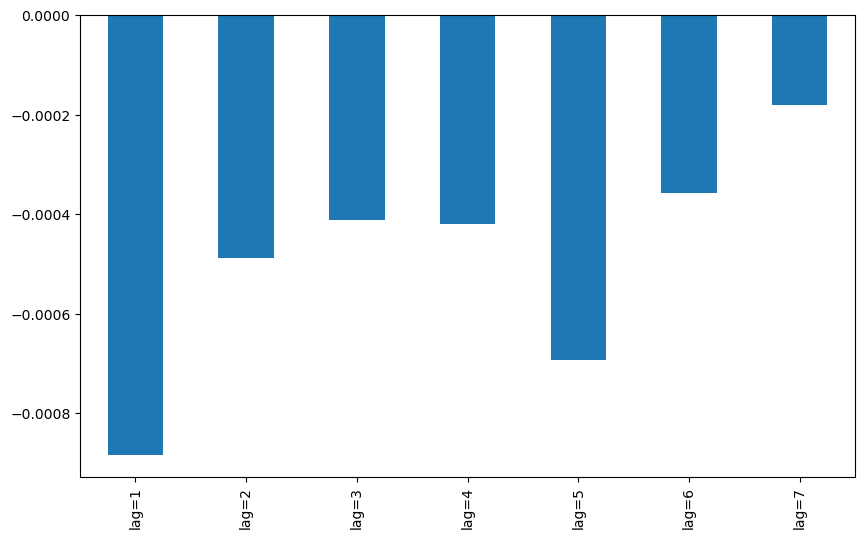

In [23]:
regd.mean().plot(kind='bar', figsize=(10, 6));

In [ ]:
# 50%대의 정확성

In [45]:
%%time
from sklearn.neural_network import MLPRegressor

for sym in data.columns:
    df = dfs[sym]
    model = MLPRegressor(hidden_layer_sizes=[512],
                        random_state=100,
                        max_iter=1000,
                        early_stopping=True,
                        validation_fraction=0.15,
                        shuffle=False) 
    model.fit(df[cols], df[sym])  # model fit
    pred = model.predict(df[cols]) 
    acc = accuracy_score(np.sign(df[sym]), np.sign(pred)) 
    print(f'MLP | {sym:10s} | acc={acc:.4f}')

MLP | AAPL.O     | acc=0.6005
MLP | MSFT.O     | acc=0.5853
MLP | INTC.O     | acc=0.5766
MLP | AMZN.O     | acc=0.5510
MLP | GS.N       | acc=0.6527
MLP | SPY        | acc=0.5419
MLP | .SPX       | acc=0.5399
MLP | .VIX       | acc=0.6579
MLP | EUR=       | acc=0.5642
MLP | XAU=       | acc=0.5522
MLP | GDX        | acc=0.6029
MLP | GLD        | acc=0.5259
CPU times: total: 23.3 s
Wall time: 20.5 s


In [ ]:
# 50 ~ 60%대의 정확성

In [47]:
import tensorflow as tf
from keras.layers import Dense
from keras.models import Sequential

np.random.seed(100)
tf.random.set_seed(100)

def create_model(problem='regression'): 
    model = Sequential()
    model.add(Dense(512, input_dim=len(cols),
                    activation='relu'))
    if problem == 'regression':
        model.add(Dense(1, activation='linear'))
        model.compile(loss='mse', optimizer='adam')
    else:
        model.add(Dense(1, activation='sigmoid'))
        model.compile(loss='binary_crossentropy', optimizer='adam')
    return model


In [48]:
%%time
for sym in data.columns[:]:
    df = dfs[sym]
    model = create_model() 
    model.fit(df[cols], df[sym], epochs=25, verbose=False) 
    pred = model.predict(df[cols]) 
    acc = accuracy_score(np.sign(df[sym]), np.sign(pred)) 
    print(f'DNN | {sym:10s} | acc={acc:.4f}')

79/79 [==============================] - 0s 2ms/step
DNN | AAPL.O     | acc=0.5889
79/79 [==============================] - 0s 2ms/step
DNN | MSFT.O     | acc=0.6017
79/79 [==============================] - 0s 1ms/step
DNN | INTC.O     | acc=0.6089
79/79 [==============================] - 0s 2ms/step
DNN | AMZN.O     | acc=0.5925
79/79 [==============================] - 0s 2ms/step
DNN | GS.N       | acc=0.6077
79/79 [==============================] - 0s 1ms/step
DNN | SPY        | acc=0.5746
79/79 [==============================] - 0s 2ms/step
DNN | .SPX       | acc=0.5514
79/79 [==============================] - 0s 2ms/step
DNN | .VIX       | acc=0.6388
79/79 [==============================] - 0s 2ms/step
DNN | EUR=       | acc=0.5371
79/79 [==============================] - 0s 2ms/step
DNN | XAU=       | acc=0.6172
79/79 [==============================] - 0s 2ms/step
DNN | GDX        | acc=0.6288
79/79 [==============================] - 0s 2ms/step
DNN | GLD        | acc=0.5658
CPU 

In [ ]:
# MLPRegressor 보다 약간 좋아보인다

In [ ]:
# 테스트를 분리해서 검사

In [49]:
split = int(len(dfs[sym]) * 0.8)

In [50]:
%%time
for sym in data.columns:
    df = dfs[sym]
    train = df.iloc[:split] 
    reg = np.linalg.lstsq(train[cols], train[sym], rcond=-1)[0]
    test = df.iloc[split:] 
    pred = np.dot(test[cols], reg)
    acc = accuracy_score(np.sign(test[sym]), np.sign(pred))
    print(f'OLS | {sym:10s} | acc={acc:.4f}')


OLS | AAPL.O     | acc=0.5219
OLS | MSFT.O     | acc=0.4960
OLS | INTC.O     | acc=0.5418
OLS | AMZN.O     | acc=0.4841
OLS | GS.N       | acc=0.4980
OLS | SPY        | acc=0.5020
OLS | .SPX       | acc=0.5120
OLS | .VIX       | acc=0.5458
OLS | EUR=       | acc=0.4482
OLS | XAU=       | acc=0.5299
OLS | GDX        | acc=0.5159
OLS | GLD        | acc=0.5100
CPU times: total: 62.5 ms
Wall time: 59 ms


In [ ]:
# 비슷하게 50% 수준

In [51]:
%%time
for sym in data.columns:
    df = dfs[sym]
    train = df.iloc[:split]
    model = MLPRegressor(hidden_layer_sizes=[512],
                        random_state=100,
                        max_iter=1000,
                        early_stopping=True,
                        validation_fraction=0.15,
                        shuffle=False)
    model.fit(train[cols], train[sym])
    test = df.iloc[split:]
    pred = model.predict(test[cols])
    acc = accuracy_score(np.sign(test[sym]), np.sign(pred))
    print(f'MLP | {sym:10s} | acc={acc:.4f}')


MLP | AAPL.O     | acc=0.4920
MLP | MSFT.O     | acc=0.5279
MLP | INTC.O     | acc=0.5279
MLP | AMZN.O     | acc=0.4641
MLP | GS.N       | acc=0.5040
MLP | SPY        | acc=0.5259
MLP | .SPX       | acc=0.5478
MLP | .VIX       | acc=0.5279
MLP | EUR=       | acc=0.4980
MLP | XAU=       | acc=0.5239
MLP | GDX        | acc=0.4880
MLP | GLD        | acc=0.5000
CPU times: total: 16.1 s
Wall time: 13.7 s


In [ ]:
# 학습 표본외의 경우 50%대로 낮아짐 -> OLS와 비슷해짐

In [52]:
%%time
for sym in data.columns:
    df = dfs[sym]
    train = df.iloc[:split]
    model = create_model()
    model.fit(train[cols], train[sym], epochs=50, verbose=False)
    test = df.iloc[split:]
    pred = model.predict(test[cols])
    acc = accuracy_score(np.sign(test[sym]), np.sign(pred))
    print(f'DNN | {sym:10s} | acc={acc:.4f}')


16/16 [==============================] - 0s 2ms/step
DNN | AAPL.O     | acc=0.4741
16/16 [==============================] - 0s 2ms/step
DNN | MSFT.O     | acc=0.4940
16/16 [==============================] - 0s 1ms/step
DNN | INTC.O     | acc=0.4821
16/16 [==============================] - 0s 2ms/step
DNN | AMZN.O     | acc=0.4641
16/16 [==============================] - 0s 2ms/step
DNN | GS.N       | acc=0.4761
16/16 [==============================] - 0s 2ms/step
DNN | SPY        | acc=0.4940
16/16 [==============================] - 0s 3ms/step
DNN | .SPX       | acc=0.5100
16/16 [==============================] - 0s 2ms/step
DNN | .VIX       | acc=0.5159
16/16 [==============================] - 0s 3ms/step
DNN | EUR=       | acc=0.5339
16/16 [==============================] - 0s 2ms/step
DNN | XAU=       | acc=0.4661
16/16 [==============================] - 0s 2ms/step
DNN | GDX        | acc=0.4622
16/16 [==============================] - 0s 2ms/step
DNN | GLD        | acc=0.4880
CPU 

In [ ]:
# keras도 마찬가지
# 이 결과를 보면 시장은 약한 형태의 효율적이라고 볼 수 있다
# OLS, MLP를 통한 접근으로는 통계적 비효율성을 발견하기에 충분하지 않다

In [ ]:
# More Features

In [53]:
url = 'http://hilpisch.com/aiif_eikon_eod_data.csv'
data = pd.read_csv(url, index_col=0, parse_dates=True).dropna()

def add_lags(data, ric, lags, window=50):
    cols = []
    df = pd.DataFrame(data[ric])
    df.dropna(inplace=True)
    df['r'] = np.log(df / df.shift())
    df['sma'] = df[ric].rolling(window).mean()  # simple moving average
    df['min'] = df[ric].rolling(window).min()   # rolling minimum
    df['max'] = df[ric].rolling(window).max()   # rolling maximum
    df['mom'] = df['r'].rolling(window).mean()  # momentum as average of log returns
    df['vol'] = df['r'].rolling(window).std()   # Rolling volatility
    df.dropna(inplace=True)
    df['d'] = np.where(df['r'] > 0, 1, 0)       # Direction of binary feature
    features = [ric, 'r', 'd', 'sma', 'min', 'max', 'mom', 'vol']
    for f in features:
        for lag in range(1, lags + 1):
            col = f'{f}_lag_{lag}'
            df[col] = df[f].shift(lag)
            cols.append(col)
    df.dropna(inplace=True)
    return df, cols


In [54]:
lags = 5

dfs = {}
for ric in data:
    df, cols = add_lags(data, ric, lags)
    dfs[ric] = df.dropna(), cols

In [58]:
df.head()

,GLD,r,sma,min,max,mom,vol,d,GLD_lag_1,GLD_lag_2,...,mom_lag_1,mom_lag_2,mom_lag_3,mom_lag_4,mom_lag_5,vol_lag_1,vol_lag_2,vol_lag_3,vol_lag_4,vol_lag_5
Date,,,,,,,,,,,,,,,,,,,,,
2010-03-24,106.30,-0.018825,108.51912,104.04,112.03,-0.001196,0.012002,0,-1.217643,-1.248673,...,-0.511530,-0.516307,-0.536271,0.012563,-0.107888,0.823851,0.822168,0.824949,0.805238,0.792385
2010-03-25,106.78,0.004505,108.44492,104.04,112.03,-0.000683,0.011676,1,-1.331384,-1.216585,...,-1.010693,-0.511236,-0.516007,-0.536189,0.012606,0.856975,0.823158,0.821472,0.824267,0.804562
2010-03-26,108.59,0.016809,108.38592,104.04,112.03,-0.000536,0.011852,1,-1.304356,-1.330302,...,-0.611066,-1.010374,-0.510936,-0.515924,-0.536145,0.755009,0.856286,0.822463,0.820790,0.823595
2010-03-29,108.75,0.001472,108.32032,104.04,111.63,-0.000594,0.011834,1,-1.202439,-1.303280,...,-0.496501,-0.610768,-1.010047,-0.510854,-0.515881,0.809829,0.754307,0.855595,0.821781,0.820117
2010-03-30,107.97,-0.007198,108.26252,104.04,111.63,-0.000528,0.011787,0,-1.193430,-1.201385,...,-0.541874,-0.496208,-0.610462,-1.009970,-0.510810,0.804348,0.809134,0.753603,0.854918,0.821108


In [55]:
from sklearn.neural_network import MLPClassifier

In [56]:
%%time
for ric in data:
    model = MLPClassifier(hidden_layer_sizes=[512],
                        random_state=100,
                        max_iter=1000,
                        early_stopping=True,
                        validation_fraction=0.15,
                        shuffle=False)
    df, cols = dfs[ric]
    df[cols] = (df[cols] - df[cols].mean()) / df[cols].std() 
    model.fit(df[cols], df['d'])
    pred = model.predict(df[cols])
    acc = accuracy_score(df['d'], pred)
    print(f'IN-SAMPLE | {ric:7s} | acc={acc:.4f}')

IN-SAMPLE | AAPL.O  | acc=0.5510
IN-SAMPLE | MSFT.O  | acc=0.5376
IN-SAMPLE | INTC.O  | acc=0.5607
IN-SAMPLE | AMZN.O  | acc=0.5559
IN-SAMPLE | GS.N    | acc=0.5794
IN-SAMPLE | SPY     | acc=0.5729
IN-SAMPLE | .SPX    | acc=0.5941
IN-SAMPLE | .VIX    | acc=0.6940
IN-SAMPLE | EUR=    | acc=0.5766
IN-SAMPLE | XAU=    | acc=0.5672
IN-SAMPLE | GDX     | acc=0.5847
IN-SAMPLE | GLD     | acc=0.5567
CPU times: total: 14.1 s
Wall time: 11.4 s


In [57]:
%%time
for ric in data:
    model = create_model('classification')
    df, cols = dfs[ric]
    df[cols] = (df[cols] - df[cols].mean()) / df[cols].std() 
    model.fit(df[cols], df['d'], epochs=50, verbose=False)
    pred = np.where(model.predict(df[cols]) > 0.5, 1, 0)
    acc = accuracy_score(df['d'], pred)
    print(f'IN-SAMPLE | {ric:7s} | acc={acc:.4f}')

77/77 [==============================] - 0s 2ms/step
IN-SAMPLE | AAPL.O  | acc=0.6969
77/77 [==============================] - 0s 2ms/step
IN-SAMPLE | MSFT.O  | acc=0.6973
77/77 [==============================] - 0s 2ms/step
IN-SAMPLE | INTC.O  | acc=0.6957
77/77 [==============================] - 0s 2ms/step
IN-SAMPLE | AMZN.O  | acc=0.6741
77/77 [==============================] - 0s 2ms/step
IN-SAMPLE | GS.N    | acc=0.7058
77/77 [==============================] - 0s 2ms/step
IN-SAMPLE | SPY     | acc=0.6879
77/77 [==============================] - 0s 2ms/step
IN-SAMPLE | .SPX    | acc=0.6900
77/77 [==============================] - 0s 2ms/step
IN-SAMPLE | .VIX    | acc=0.7452
77/77 [==============================] - 0s 2ms/step
IN-SAMPLE | EUR=    | acc=0.6802
77/77 [==============================] - 0s 2ms/step
IN-SAMPLE | XAU=    | acc=0.7009
77/77 [==============================] - 0s 2ms/step
IN-SAMPLE | GDX     | acc=0.6802
77/77 [==============================] - 0s 2ms/step
I

In [59]:
def train_test_model(model):
    for ric in data:
        df, cols = dfs[ric]
        split = int(len(df) * 0.85)
        train = df.iloc[:split].copy()
        mu, std = train[cols].mean(), train[cols].std() 
        train[cols] = (train[cols] - mu) / std
        model.fit(train[cols], train['d'])
        test = df.iloc[split:].copy()
        test[cols] = (test[cols] - mu) / std
        pred = model.predict(test[cols])
        acc = accuracy_score(test['d'], pred)
        print(f'OUT-OF-SAMPLE | {ric:7s} | acc={acc:.4f}')

In [60]:
model_mlp = MLPClassifier(hidden_layer_sizes=[512],
                            random_state=100,
                            max_iter=1000,
                            early_stopping=True,
                            validation_fraction=0.15,
                            shuffle=False)

In [61]:
%time train_test_model(model_mlp)

OUT-OF-SAMPLE | AAPL.O  | acc=0.4432
OUT-OF-SAMPLE | MSFT.O  | acc=0.4595
OUT-OF-SAMPLE | INTC.O  | acc=0.5000
OUT-OF-SAMPLE | AMZN.O  | acc=0.5270
OUT-OF-SAMPLE | GS.N    | acc=0.4838
OUT-OF-SAMPLE | SPY     | acc=0.4811
OUT-OF-SAMPLE | .SPX    | acc=0.5027
OUT-OF-SAMPLE | .VIX    | acc=0.5676
OUT-OF-SAMPLE | EUR=    | acc=0.4649
OUT-OF-SAMPLE | XAU=    | acc=0.5514
OUT-OF-SAMPLE | GDX     | acc=0.5162
OUT-OF-SAMPLE | GLD     | acc=0.4946
CPU times: total: 8.86 s
Wall time: 7.03 s


In [ ]:
# 샘플 내의 성능은 좋은데 샘플 밖의 성능은 좋지 않은 과적합 문제 -> 앙상블을 이용해서 개선

In [62]:
from sklearn.ensemble import BaggingClassifier

base_estimator = MLPClassifier(hidden_layer_sizes=[256],
                                random_state=100,
                                max_iter=1000,
                                early_stopping=True,
                                validation_fraction=0.15,
                                shuffle=False)

model_bag = BaggingClassifier(base_estimator=base_estimator, 
                                n_estimators=35,  # number of estimators used
                                max_samples=0.25, 
                                max_features=0.5, 
                                bootstrap=False, 
                                bootstrap_features=True, 
                                n_jobs=8, 
                                random_state=100)

In [63]:
%time train_test_model(model_bag)

OUT-OF-SAMPLE | AAPL.O  | acc=0.5000
OUT-OF-SAMPLE | MSFT.O  | acc=0.5703
OUT-OF-SAMPLE | INTC.O  | acc=0.5054
OUT-OF-SAMPLE | AMZN.O  | acc=0.5270
OUT-OF-SAMPLE | GS.N    | acc=0.5135
OUT-OF-SAMPLE | SPY     | acc=0.5568
OUT-OF-SAMPLE | .SPX    | acc=0.5514
OUT-OF-SAMPLE | .VIX    | acc=0.5432
OUT-OF-SAMPLE | EUR=    | acc=0.5054
OUT-OF-SAMPLE | XAU=    | acc=0.5351
OUT-OF-SAMPLE | GDX     | acc=0.5054
OUT-OF-SAMPLE | GLD     | acc=0.5189
CPU times: total: 2.14 s
Wall time: 23.7 s


In [ ]:
# 성능이 약간 좋아짐

In [ ]:
# intraday data

In [64]:
url = 'http://hilpisch.com/aiif_eikon_id_data.csv'
data = pd.read_csv(url, index_col=0, parse_dates=True)
data.head()

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2019-03-01 00:00:00,173.15,112.09,53.03,1640.4,NaN,278.59,NaN,NaN,1.1373,1314.0663,22.24,124.07
2019-03-01 01:00:00,173.44,112.24,NaN,1642.8,NaN,278.80,NaN,NaN,1.1369,1312.9100,22.24,124.08
2019-03-01 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.1372,1314.3636,NaN,NaN
2019-03-01 03:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.1367,1313.2452,NaN,NaN
2019-03-01 04:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.1369,1313.1746,NaN,NaN


In [65]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5529 entries, 2019-03-01 00:00:00 to 2020-01-01 00:00:00
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL.O  3384 non-null   float64
 1   MSFT.O  3378 non-null   float64
 2   INTC.O  3275 non-null   float64
 3   AMZN.O  3381 non-null   float64
 4   GS.N    1686 non-null   float64
 5   SPY     3388 non-null   float64
 6   .SPX    1802 non-null   float64
 7   .VIX    2959 non-null   float64
 8   EUR=    5429 non-null   float64
 9   XAU=    5149 non-null   float64
 10  GDX     3173 non-null   float64
 11  GLD     3351 non-null   float64
dtypes: float64(12)
memory usage: 561.5 KB


In [66]:
lags = 5
dfs = {}

for ric in data:
    df, cols = add_lags(data, ric, lags)
    dfs[ric] = df, cols

In [67]:
%time train_test_model(model_mlp)

OUT-OF-SAMPLE | AAPL.O  | acc=0.5420
OUT-OF-SAMPLE | MSFT.O  | acc=0.4930
OUT-OF-SAMPLE | INTC.O  | acc=0.5549
OUT-OF-SAMPLE | AMZN.O  | acc=0.4709
OUT-OF-SAMPLE | GS.N    | acc=0.5184
OUT-OF-SAMPLE | SPY     | acc=0.4860
OUT-OF-SAMPLE | .SPX    | acc=0.5019
OUT-OF-SAMPLE | .VIX    | acc=0.4885
OUT-OF-SAMPLE | EUR=    | acc=0.5130
OUT-OF-SAMPLE | XAU=    | acc=0.4824
OUT-OF-SAMPLE | GDX     | acc=0.4765
OUT-OF-SAMPLE | GLD     | acc=0.5455
CPU times: total: 14.5 s
Wall time: 12.3 s


In [68]:
%time train_test_model(model_bag)

OUT-OF-SAMPLE | AAPL.O  | acc=0.5660
OUT-OF-SAMPLE | MSFT.O  | acc=0.5551
OUT-OF-SAMPLE | INTC.O  | acc=0.5072
OUT-OF-SAMPLE | AMZN.O  | acc=0.4830
OUT-OF-SAMPLE | GS.N    | acc=0.5020
OUT-OF-SAMPLE | SPY     | acc=0.4680
OUT-OF-SAMPLE | .SPX    | acc=0.4677
OUT-OF-SAMPLE | .VIX    | acc=0.5161
OUT-OF-SAMPLE | EUR=    | acc=0.5242
OUT-OF-SAMPLE | XAU=    | acc=0.5229
OUT-OF-SAMPLE | GDX     | acc=0.5107
OUT-OF-SAMPLE | GLD     | acc=0.5475
CPU times: total: 2.36 s
Wall time: 21.5 s


In [ ]:
# 배깅 55% 대를 유지하며 좋은듯? 좀더 일관된 성능을 보여준다